In [1]:
import numpy as np
np.random.seed(123)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os, os.path
import keras
import time
import scipy.misc
import scipy.ndimage

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
from matplotlib import pyplot as PLT


from PIL import Image

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 5110)


In [14]:
from keras.models import load_model
z = 75
y = 100

model = load_model('16filter.h5'.format(y,z))
total1 = 0
total2 = 0
total3 = 0
img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/SciFi-CAIR2/Images_Jul_2017/IMG1252.bmp'))
img = scipy.misc.imresize(img, (z, y))
img = np.reshape(img,[1,z,y,1])
for x in range (0,9999):
    #t0 = time.time()
    #img = scipy.misc.imresize(img, (z, y)) #resizing image to parse through NN
    #t1 = time.time()
    #img = np.reshape(img,[1,z,y,1])
    t2 = time.time()
    Class = model.predict_classes(img, verbose=0)
    t3 = time.time()
    #img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/SciFi-CAIR2/Images_Jul_2017/IMG1252.bmp'))
    #total1 = total1 + (t1-t0)
    #total2 = total2 + (t2-t1)
    total3 = total3 + (t3-t2)

#print("Image resize time:", total1/10)
#print("Image format time:", total2/10)
print("Image classification time:", total3/10)
#print("Total time:", (total1+total2+total3)/10)




Image classification time: 1.579831600189209


In [3]:
f1 = open("resizetime.txt","a+")
f2 = open("formattime.txt","a+")
f3 = open("classtime.txt","a+")
f4 = open("totaltime.txt","a+")
f1.write("{}x{} {:.5f}".format(y,z,total1))
f2.write("{}x{} {:.5f}".format(y,z,total2))
f3.write("{}x{} {:.5f}".format(y,z,total3))
f4.write("{}x{} {:.5f}".format(y,z,(total3+total2+total1)))

f1.close()
f2.close()
f3.close()
f4.close()         

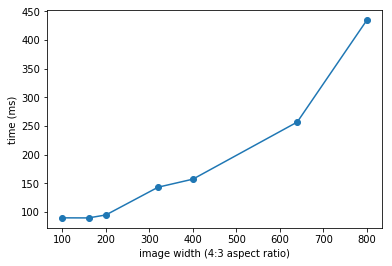

In [6]:
plt.plotfile('totaltime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

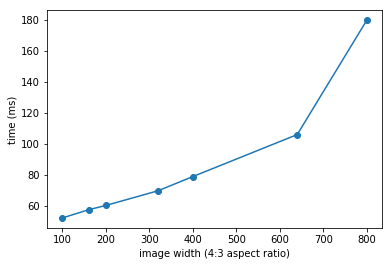

In [7]:
plt.plotfile('resizetime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

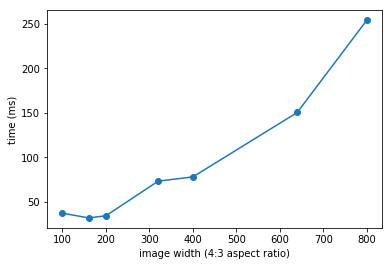

In [8]:
plt.plotfile('classtime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

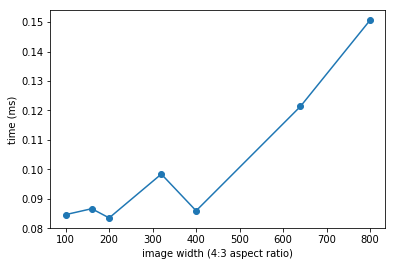

In [9]:
plt.plotfile('formattime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

0.962794959545
[  4.94065646e-324   1.88421011e-002   1.39923990e-002 ...,
   2.17805922e-004   2.20752365e-004   2.19703114e-004]
1238


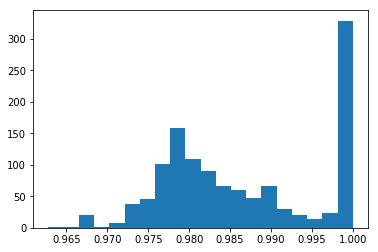

In [18]:
col1, col2 = np.genfromtxt('histstill.dat', unpack=True, dtype=np.float)

print(np.min(col1[1:]))
print(col2)
print(len(col2))
fig, ax = plt.subplots()

ax.hist(col1[1:], bins=20)
#ax.hist(col2)
plt.show()



(600, 800)


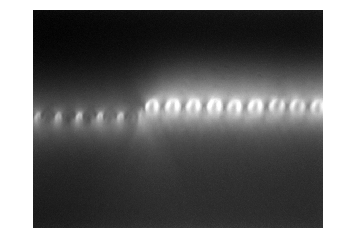

In [16]:
img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/SciFi-CAIR2/Images_Jul_2017/Grey_800x600/PosTrain/IMG11931.bmp'))
#img = scipy.misc.imresize(img, (75,100))
#img = scipy.ndimage.interpolation.shift(img, (25,0), output=None, order=1, mode='nearest', cval=0.0, prefilter=True)
print(img.shape)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.savefig('../Data/600_800_pos.png')
plt.show()

In [23]:
for width in range(40, 800+20, 20):
    height = 0.75*width
    if height%0.75 == 0:
        img2 = scipy.misc.imresize(img, (int(height), int(width)))
        plt.imshow(img2, cmap='gray')
        plt.savefig('../Data/{:d}_{:d}_pos.png'.format(int(height), int(width)))

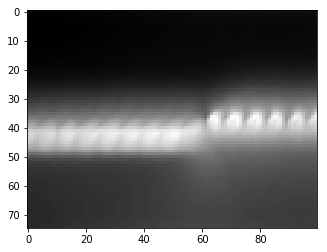

In [10]:
img2 = scipy.misc.imresize(img, (75,100))
#img2 = scipy.ndimage.interpolation.shift(img, (0,200), output=None, order=1, mode='nearest', cval=0.0, prefilter=True)

plt.imshow(img2, cmap='gray')
plt.show()

In [1]:
from datetime import datetime

In [10]:
str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

'2017-08-22_10-12-53'